# Analysis On Fezzari AccesoriesSales Data 

Hi! all, In this project i have taken sales dataset of Fezzari accesories. Cleaned the data, performed some data analysis techniques and Data visualisation techniques for analysing the sales of Ferrari Company. 

Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [76]:
df=pd.read_csv("Fezzari sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Time              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Customer Age      34864 non-null  float64
 4   Customer Gender   34864 non-null  object 
 5   Country           34866 non-null  object 
 6   State             34864 non-null  object 
 7   Product Category  34863 non-null  object 
 8   Sub Category      34864 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit Cost         34864 non-null  float64
 11  Revenue           34866 non-null  float64
 12  Payment           34867 non-null  object 
 13  Rating            34866 non-null  float64
dtypes: float64(6), object(8)
memory usage: 3.7+ MB


The Data set contains 34867 rows and 13 columns so let clean the data and only keep relavant infomation for performing the visualisation and analysis

In [77]:
df.head()

,Date,Time,Year,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Revenue,Payment,Rating
0,02-19-16,13:08,2016.0,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.0,Credit Card,6.5
1,2-20-16,10:29,2016.0,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,57.0,Credit Card,5.0
2,2-27-16,13:23,2016.0,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,15.0,Cash,7.5
3,12-03-2016,20:33,2016.0,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,233.0,Cash,6.5
4,12-03-2016,10:37,2016.0,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,125.0,Cash,8.0


In [78]:
#Removing the columns that are not usedin our analysis
df.drop(['Date','Time','Rating','Product Category'],axis=1,inplace=True)

df.head()

,Year,Customer Age,Customer Gender,Country,State,Sub Category,Quantity,Unit Cost,Revenue,Payment
0,2016.0,29.0,F,United States,Washington,Tires and Tubes,1.0,80.00,109.0,Credit Card
1,2016.0,29.0,F,United States,Washington,Gloves,2.0,24.50,57.0,Credit Card
2,2016.0,29.0,F,United States,Washington,Tires and Tubes,3.0,3.67,15.0,Cash
3,2016.0,29.0,F,United States,Washington,Tires and Tubes,2.0,87.50,233.0,Cash
4,2016.0,29.0,F,United States,Washington,Tires and Tubes,3.0,35.00,125.0,Cash


In [79]:
df['Cost']=df['Unit Cost']*df['Quantity']
df['Cost']

0          80.00
1          49.00
2          11.01
3         175.00
4         105.00
          ...   
34862    2320.00
34863    2049.00
34864    2049.00
34865    2320.00
34866        NaN
Name: Cost, Length: 34867, dtype: float64

In [80]:
df.drop(['Quantity','Unit Cost'],axis=1,inplace=True)
df.head()

,Year,Customer Age,Customer Gender,Country,State,Sub Category,Revenue,Payment,Cost
0,2016.0,29.0,F,United States,Washington,Tires and Tubes,109.0,Credit Card,80.00
1,2016.0,29.0,F,United States,Washington,Gloves,57.0,Credit Card,49.00
2,2016.0,29.0,F,United States,Washington,Tires and Tubes,15.0,Cash,11.01
3,2016.0,29.0,F,United States,Washington,Tires and Tubes,233.0,Cash,175.00
4,2016.0,29.0,F,United States,Washington,Tires and Tubes,125.0,Cash,105.00


Changing the Order of Columns

In [81]:
title=list(df.columns)
title

['Year',
 'Customer Age',
 'Customer Gender',
 'Country',
 'State',
 'Sub Category',
 'Revenue',
 'Payment',
 'Cost']

In [82]:
title[6],title[8]=title[8],title[6]
title




['Year',
 'Customer Age',
 'Customer Gender',
 'Country',
 'State',
 'Sub Category',
 'Cost',
 'Payment',
 'Revenue']

In [83]:
df=df[title]
df

,Year,Customer Age,Customer Gender,Country,State,Sub Category,Cost,Payment,Revenue
0,2016.0,29.0,F,United States,Washington,Tires and Tubes,80.00,Credit Card,109.00
1,2016.0,29.0,F,United States,Washington,Gloves,49.00,Credit Card,57.00
2,2016.0,29.0,F,United States,Washington,Tires and Tubes,11.01,Cash,15.00
3,2016.0,29.0,F,United States,Washington,Tires and Tubes,175.00,Cash,233.00
4,2016.0,29.0,F,United States,Washington,Tires and Tubes,105.00,Cash,125.00
...,...,...,...,...,...,...,...,...,...
34862,2016.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2320.00,Ewallet,1971.00
34863,2015.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2049.00,Cash,1583.00
34864,2015.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2049.00,Cash,1682.00
34865,2015.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2320.00,Cash,1568.00


In [84]:
# Renaming Column Names 
df = df.rename(columns={"Payment":"Payment type"})
df= df.rename(columns = {"Customer Gender":"Gender"})
df= df.rename(columns={"Customer Age":"Age"})
df= df.rename(columns={"Sub Category":"Category"})

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          34866 non-null  float64
 1   Age           34864 non-null  float64
 2   Gender        34864 non-null  object 
 3   Country       34866 non-null  object 
 4   State         34864 non-null  object 
 5   Category      34864 non-null  object 
 6   Cost          34864 non-null  float64
 7   Payment type  34867 non-null  object 
 8   Revenue       34866 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.4+ MB


In [86]:
df.head()

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
0,2016.0,29.0,F,United States,Washington,Tires and Tubes,80.00,Credit Card,109.0
1,2016.0,29.0,F,United States,Washington,Gloves,49.00,Credit Card,57.0
2,2016.0,29.0,F,United States,Washington,Tires and Tubes,11.01,Cash,15.0
3,2016.0,29.0,F,United States,Washington,Tires and Tubes,175.00,Cash,233.0
4,2016.0,29.0,F,United States,Washington,Tires and Tubes,105.00,Cash,125.0


In [87]:
df.dtypes

Year            float64
Age             float64
Gender           object
Country          object
State            object
Category         object
Cost            float64
Payment type     object
Revenue         float64
dtype: object

In [88]:
df.dropna()

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
0,2016.0,29.0,F,United States,Washington,Tires and Tubes,80.00,Credit Card,109.0
1,2016.0,29.0,F,United States,Washington,Gloves,49.00,Credit Card,57.0
2,2016.0,29.0,F,United States,Washington,Tires and Tubes,11.01,Cash,15.0
3,2016.0,29.0,F,United States,Washington,Tires and Tubes,175.00,Cash,233.0
4,2016.0,29.0,F,United States,Washington,Tires and Tubes,105.00,Cash,125.0
...,...,...,...,...,...,...,...,...,...
34861,2015.0,38.0,M,France,Charente-Maritime,Mountain Bikes,2049.00,Cash,1487.0
34862,2016.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2320.00,Ewallet,1971.0
34863,2015.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2049.00,Cash,1583.0
34864,2015.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2049.00,Cash,1682.0


#### We cleaned the data according to our requirement now lets analyse the Data.

In [89]:
df

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
0,2016.0,29.0,F,United States,Washington,Tires and Tubes,80.00,Credit Card,109.00
1,2016.0,29.0,F,United States,Washington,Gloves,49.00,Credit Card,57.00
2,2016.0,29.0,F,United States,Washington,Tires and Tubes,11.01,Cash,15.00
3,2016.0,29.0,F,United States,Washington,Tires and Tubes,175.00,Cash,233.00
4,2016.0,29.0,F,United States,Washington,Tires and Tubes,105.00,Cash,125.00
...,...,...,...,...,...,...,...,...,...
34862,2016.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2320.00,Ewallet,1971.00
34863,2015.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2049.00,Cash,1583.00
34864,2015.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2049.00,Cash,1682.00
34865,2015.0,38.0,M,France,Hauts de Seine,Mountain Bikes,2320.00,Cash,1568.00


The Data set has 34867 rows and 9 columns

# Analysis

In [90]:
df["Country"].value_counts()


United States     18076
United Kingdom     6421
Germany            5201
France             5168
Name: Country, dtype: int64

The data set contains sales of ferrari accessories in four countries as mentioned above

<AxesSubplot:ylabel='Country'>

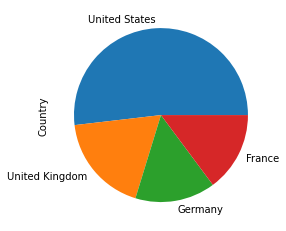

In [91]:
df["Country"].value_counts().plot(kind="pie")

### Insights
We can see that United States has more than 50% of the Sales followed By United kingdom and Germany.

Lets Break down united states sales

In [92]:
Us_states = df[df['Country']=='United States']['State'].value_counts()
Us_states

California        10331
Washington         5203
Oregon             2446
Texas                14
Illinois             14
Ohio                 13
New York             10
Florida               7
South Carolina        5
Utah                  5
Kentucky              4
Wyoming               3
Minnesota             3
Alabama               2
North Carolina        2
Georgia               2
Virginia              2
Mississippi           2
Montana               2
Arizona               2
Missouri              1
Massachusetts         1
Name: State, dtype: int64

Text(0.5, 1.0, 'Number of Sales in United Sates in each State')

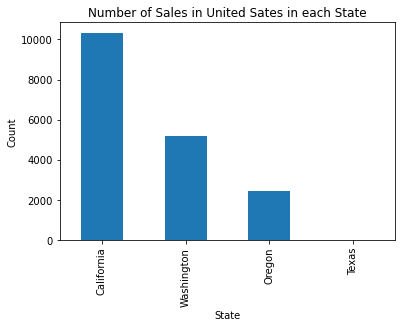

In [93]:
Us_states.nlargest(4).plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Number of Sales in United Sates in each State",)

Most of the sales of Ferrari are from California followed by washington and Oregon in the united states

### Data Analysis with respect to Gender

In [94]:
df['Gender'].value_counts()

M    17805
F    17059
Name: Gender, dtype: int64

There are 17805 Male and 17059 females customers in the four countries

In [95]:
male=df[df['Gender']=='M']['Country'].value_counts()
male

United States     9377
United Kingdom    3253
Germany           2602
France            2573
Name: Country, dtype: int64

In [96]:
female=df[df['Gender']=='F']['Country'].value_counts()
female

United States     8697
United Kingdom    3168
Germany           2599
France            2595
Name: Country, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


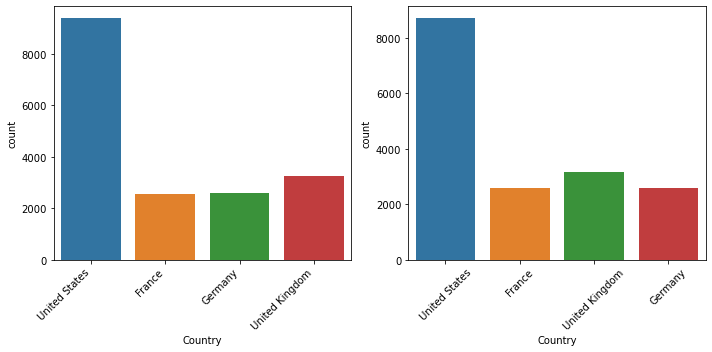

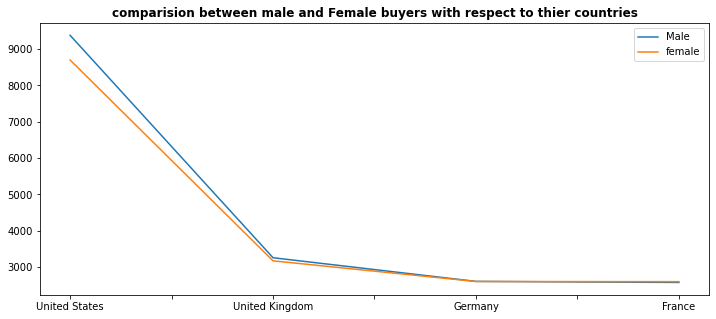

In [97]:
k=plt.figure(figsize=(10,5))
k=plt.subplot(1, 2, 1)
k=sns.countplot(df[df['Gender']=='M']['Country'],data=df)

k=k.set_xticklabels(k.get_xticklabels(), rotation=45, ha="right")
k=plt.tight_layout()


v=plt.subplot(1, 2, 2)
v=sns.countplot(df[df['Gender']=='F']['Country'])
v=plt.xticks(rotation=45)
v=plt.tight_layout()

c=plt.figure(figsize=(12,5))
c=male.plot()
c=female.plot()
c=plt.title("comparision between male and Female buyers with respect to thier countries",fontweight="bold")
c=plt.legend(['Male','female'])

It can be seen that number of male buyers is more in united states than females but is almost same in Uk, Germanay and france.

### Now Lets see the age groups buying the fezzari Accessories

In [98]:
df['Age'].nunique()

70

There are 70 age groups so it is difficult to find all the data so lets plot a histogram showing number sales in each age group

In [99]:
df['Age'].value_counts()

31.0    1307
28.0    1277
34.0    1260
29.0    1233
30.0    1204
        ... 
87.0       3
80.0       3
74.0       2
76.0       2
82.0       2
Name: Age, Length: 70, dtype: int64

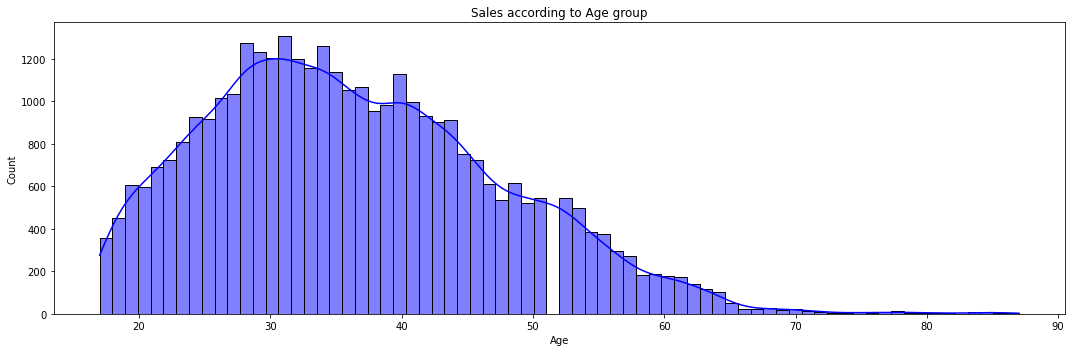

In [100]:
fig=plt.figure(figsize=(15,5))
fig=sns.histplot(data=df, x="Age", kde=True,color='blue')
fig=fig.set_title("Sales according to Age group")
fig=plt.tight_layout()
plt.show(fig)

### Now lets see what are different types of Accessories available for Sale

In [101]:
df['Category'].nunique()

17

In [102]:
df['Category'].value_counts()

Tires and Tubes      11110
Bottles and Cages     5295
Helmets               4176
Road Bikes            3022
Mountain Bikes        2737
Jerseys               2000
Caps                  1517
Touring Bikes         1334
Fenders                762
Shorts                 566
Cleaners               545
Gloves                 480
Hydration Packs        396
Socks                  364
Vests                  312
Bike Stands            145
Bike Racks             103
Name: Category, dtype: int64

<AxesSubplot:>

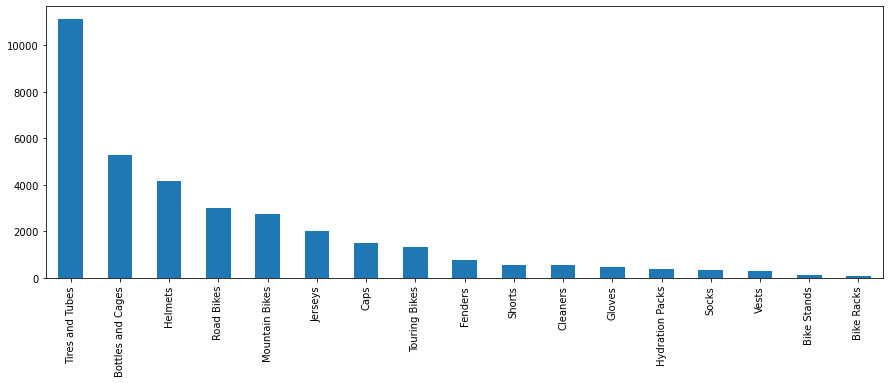

In [103]:
fig=plt.figure(figsize=(15,5))
types=df['Category'].value_counts()
types.plot(kind='bar')


Tyres and tubes are the most sold accessories 

In [104]:
df['Payment type'].nunique()

3

<AxesSubplot:ylabel='Payment type'>

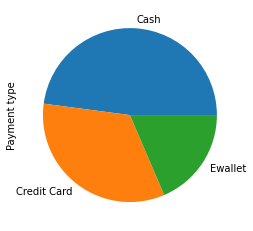

In [105]:
payments=df['Payment type'].value_counts()
payments.plot(kind='pie')

We Can see that most of the payments are done via cash

In [106]:
df[df['Country']=='United States']['Payment type'].value_counts()

Cash           8710
Credit Card    6091
Ewallet        3275
Name: Payment type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

Text(0.5, 0, 'Germany Payment type')

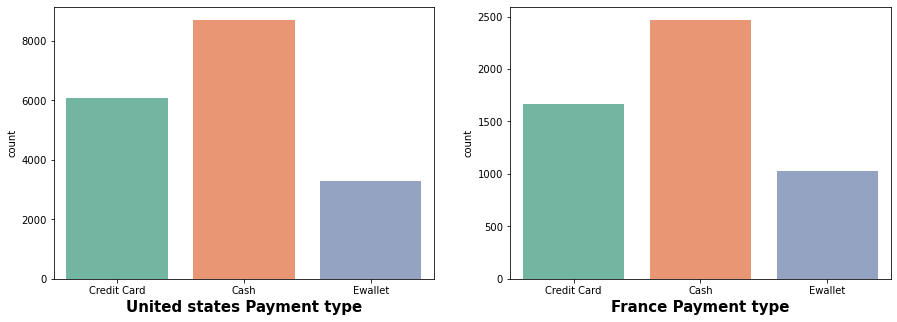

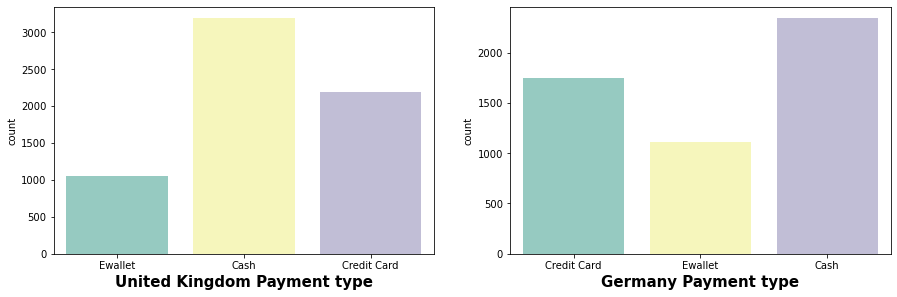

In [107]:
m=fig=plt.figure(figsize=(15,5))
m=plt.subplot(1,2,1)
m=sns.countplot(df[df['Country']=='United States']['Payment type'],palette="Set2")
plt.xlabel("United states Payment type",fontweight='bold',fontsize=15)


m=plt.subplot(1,2,2)
m=sns.countplot(df[df['Country']=='France']['Payment type'],palette="Set2")
plt.xlabel("France Payment type",fontweight='bold',fontsize=15)

m=fig=plt.figure(figsize=(15,10))
m=plt.subplot(2,2,1)
m=sns.countplot(df[df['Country']=='United Kingdom']['Payment type'],palette="Set3")
plt.xlabel("United Kingdom Payment type",fontweight='bold',fontsize=15)


m=plt.subplot(2,2,2)
m=sns.countplot(df[df['Country']=='Germany']['Payment type'],palette="Set3")
plt.xlabel("Germany Payment type",fontweight='bold',fontsize=15)

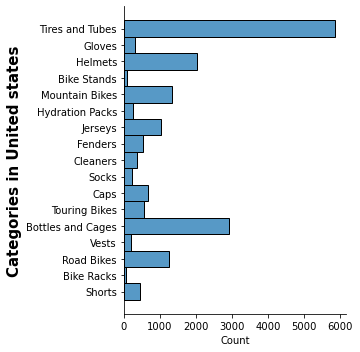

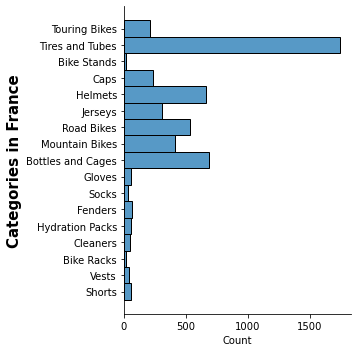

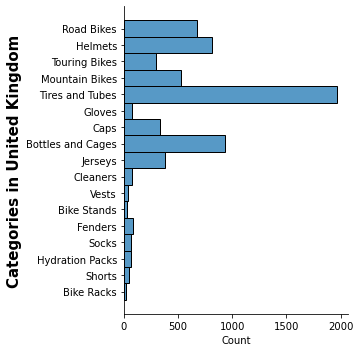

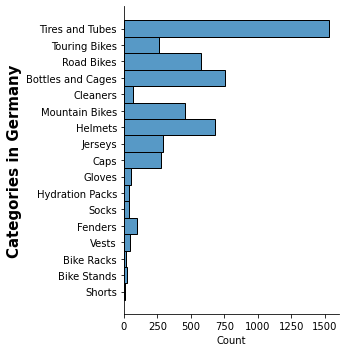

In [108]:
#n=fig=plt.figure(figsize=(15,5))
#n=plt.subplot(1,2,1)
n=sns.displot(y=df[df['Country']=='United States']['Category'])
n=plt.ylabel("Categories in United states",fontweight='bold',fontsize=15)


#n=plt.subplot(1,2,2)
n=sns.displot(y=df[df['Country']=='France']['Category'])
n=plt.ylabel("Categories in France",fontweight='bold',fontsize=15)

# n=fig=plt.figure(figsize=(15,10))
# n=plt.subplot(2,2,1)
n=sns.displot(y=df[df['Country']=='United Kingdom']['Category'])
n=plt.ylabel("Categories in United Kingdom",fontweight='bold',fontsize=15)


# n=plt.subplot(2,2,2)
n=sns.displot(y=df[df['Country']=='Germany']['Category'])
n=plt.ylabel("Categories in Germany",fontweight='bold',fontsize=15)

Sales of accessories with respect to Each Country

### Top 5 sales data -- Having highest cost


In [109]:
df.nlargest(5,'Cost') 


,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
2372,2016.0,46.0,M,United States,California,Bike Racks,3600.0,Cash,4923.0
4953,2016.0,53.0,F,United States,California,Bike Racks,3600.0,Cash,4266.0
7403,2016.0,50.0,M,Germany,Hessen,Bike Racks,3240.0,Ewallet,5082.0
33583,2016.0,40.0,M,United States,Washington,Bike Racks,3240.0,Ewallet,4216.0
2598,2016.0,32.0,M,United States,California,Bike Racks,3120.0,Cash,3887.0


### Bottom 5 Sales Data -- Having lowest cost

In [110]:
df.nsmallest(5,'Cost') 

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
175,2016.0,53.0,F,United States,California,Tires and Tubes,2.0,Cash,3.0
1642,2016.0,38.0,F,United States,Washington,Tires and Tubes,2.0,Ewallet,3.0
6596,2015.0,33.0,F,United Kingdom,England,Tires and Tubes,2.0,Cash,3.0
8260,2015.0,38.0,M,United States,California,Tires and Tubes,2.0,Cash,3.0
9519,2016.0,32.0,F,United States,California,Tires and Tubes,2.0,Credit Card,3.0


### Bottom 5 Sales Data -- Having Lowest revenue

In [111]:
df.nsmallest(5,'Revenue') 

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
111,2015.0,19.0,F,United States,California,Tires and Tubes,2.01,Credit Card,2.0
1908,2015.0,32.0,M,United States,Oregon,Tires and Tubes,2.01,Ewallet,2.0
3154,2015.0,43.0,M,United Kingdom,England,Tires and Tubes,2.01,Credit Card,2.0
15200,2016.0,38.0,M,France,Seine et Marne,Tires and Tubes,2.01,Cash,2.0
16023,2015.0,18.0,M,United States,Oregon,Tires and Tubes,2.01,Cash,2.0


### Top 5 Sales Data -- Having highest revenue

In [112]:
df.nlargest(5,'Revenue') 

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
7403,2016.0,50.0,M,Germany,Hessen,Bike Racks,3240.0,Ewallet,5082.0
2372,2016.0,46.0,M,United States,California,Bike Racks,3600.0,Cash,4923.0
6095,2016.0,23.0,M,Germany,Saarland,Bike Racks,3120.0,Cash,4550.0
4953,2016.0,53.0,F,United States,California,Bike Racks,3600.0,Cash,4266.0
13075,2016.0,40.0,F,Germany,Nordrhein-Westfalen,Bike Racks,2760.0,Cash,4219.0


### Data Grouped with respect to country

In [113]:
top=df.groupby(["Country"])["Year","Age","Gender","Category","Cost","Revenue"].max()
Bottom=df.groupby(["Country"])["Year","Age","Gender","Category","Cost","Revenue"].min()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_10404/3971753631.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top=df.groupby(["Country"])["Year","Age","Gender","Category","Cost","Revenue"].max()
C:\Users\lenovo\AppData\Local\Temp/ipykernel_10404/3971753631.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top=df.groupby(["Country"])["Year","Age","Gender","Category","Cost","Revenue"].max()
C:\Users\lenovo\AppData\Local\Temp/ipykernel_10404/3971753631.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Bottom=df.groupby(["Country"])["Year","Age","Gender","Category","Cost","Revenue"].min()
C:\Users\lenovo\AppData\Local\Temp/ipykernel_10404/3971753631.py:2: Futur

### Highest sales price in each country

In [114]:
top=pd.DataFrame(top)

In [115]:
top=top.reset_index()
top

,Country,Year,Age,Cost,Revenue
0,France,2016.0,86.0,2443.0,3681.0
1,Germany,2016.0,87.0,3240.0,5082.0
2,United Kingdom,2016.0,85.0,3120.0,4113.0
3,United States,2016.0,79.0,3600.0,4923.0


### Lowest Sales price in each country

In [116]:
Bottom=pd.DataFrame(Bottom)

In [117]:
Bottom=Bottom.reset_index()
Bottom

,Country,Year,Age,Cost,Revenue
0,France,2015.0,17.0,2.0,2.0
1,Germany,2015.0,17.0,2.0,3.0
2,United Kingdom,2015.0,17.0,2.0,2.0
3,United States,2015.0,17.0,2.0,2.0


## Data of Top 5 and Bottom 5 Revenues in each countries

In [118]:
df[df['Country']=="United States"].nlargest(5,'Revenue') 

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
2372,2016.0,46.0,M,United States,California,Bike Racks,3600.0,Cash,4923.0
4953,2016.0,53.0,F,United States,California,Bike Racks,3600.0,Cash,4266.0
33583,2016.0,40.0,M,United States,Washington,Bike Racks,3240.0,Ewallet,4216.0
2598,2016.0,32.0,M,United States,California,Bike Racks,3120.0,Cash,3887.0
16226,2016.0,62.0,F,United States,California,Bike Racks,3000.0,Ewallet,3787.0


In [119]:
df[df['Country']=="United States"].nsmallest(5,'Revenue') 

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
111,2015.0,19.0,F,United States,California,Tires and Tubes,2.01,Credit Card,2.0
1908,2015.0,32.0,M,United States,Oregon,Tires and Tubes,2.01,Ewallet,2.0
16023,2015.0,18.0,M,United States,Oregon,Tires and Tubes,2.01,Cash,2.0
16202,2015.0,36.0,M,United States,California,Tires and Tubes,2.00,Ewallet,2.0
24682,2015.0,61.0,M,United States,Oregon,Tires and Tubes,2.01,Credit Card,2.0


In [120]:
df[df['Country']=="United Kingdom"].nlargest(5,'Revenue') 

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
12114,2016.0,35.0,F,United Kingdom,England,Bike Racks,3120.0,Credit Card,4113.0
19889,2016.0,42.0,M,United Kingdom,England,Bike Racks,2760.0,Ewallet,3703.0
17405,2016.0,26.0,M,United Kingdom,England,Bike Racks,2760.0,Cash,3428.0
12909,2016.0,41.0,M,United Kingdom,England,Touring Bikes,2384.0,Ewallet,2988.0
2437,2016.0,39.0,M,United Kingdom,England,Road Bikes,2443.0,Cash,2971.0


In [121]:
df[df['Country']=="United Kingdom"].nsmallest(5,'Revenue') 

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
3154,2015.0,43.0,M,United Kingdom,England,Tires and Tubes,2.01,Credit Card,2.0
6596,2015.0,33.0,F,United Kingdom,England,Tires and Tubes,2.00,Cash,3.0
15529,2016.0,24.0,M,United Kingdom,England,Tires and Tubes,2.01,Credit Card,3.0
17359,2016.0,25.0,M,United Kingdom,England,Tires and Tubes,2.01,Cash,3.0
17531,2016.0,58.0,F,United Kingdom,England,Tires and Tubes,2.01,Cash,3.0


In [122]:
df[df['Country']=="France"].nlargest(5,'Revenue') 

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
922,2016.0,45.0,M,France,Hauts de Seine,Touring Bikes,2384.0,Cash,3681.0
30662,2016.0,31.0,M,France,Yveline,Touring Bikes,2384.0,Ewallet,3495.0
5669,2016.0,38.0,F,France,Yveline,Mountain Bikes,2320.0,Cash,3487.0
28835,2016.0,35.0,M,France,Hauts de Seine,Road Bikes,2443.0,Cash,3459.0
33761,2016.0,24.0,F,France,Essonne,Mountain Bikes,2295.0,Ewallet,3423.0


In [123]:
df[df['Country']=="France"].nsmallest(5,'Revenue')

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
15200,2016.0,38.0,M,France,Seine et Marne,Tires and Tubes,2.01,Cash,2.0
23239,2015.0,55.0,F,France,Hauts de Seine,Tires and Tubes,2.00,Credit Card,2.0
30844,2016.0,54.0,M,France,Loiret,Tires and Tubes,2.00,Cash,2.0
32238,2016.0,38.0,M,France,Nord,Tires and Tubes,2.00,Cash,2.0
4376,2016.0,27.0,M,France,Hauts de Seine,Tires and Tubes,2.01,Ewallet,3.0


In [124]:
df[df['Country']=="Germany"].nlargest(5,'Revenue')

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
7403,2016.0,50.0,M,Germany,Hessen,Bike Racks,3240.00,Ewallet,5082.0
6095,2016.0,23.0,M,Germany,Saarland,Bike Racks,3120.00,Cash,4550.0
13075,2016.0,40.0,F,Germany,Nordrhein-Westfalen,Bike Racks,2760.00,Cash,4219.0
28588,2016.0,56.0,M,Germany,Bayern,Bike Racks,2640.00,Credit Card,4008.0
5728,2016.0,39.0,M,Germany,Nordrhein-Westfalen,Road Bikes,2442.99,Credit Card,3616.0


In [125]:
df[df['Country']=="Germany"].nsmallest(5,'Revenue')

,Year,Age,Gender,Country,State,Category,Cost,Payment type,Revenue
17792,2015.0,34.0,F,Germany,Saarland,Tires and Tubes,2.00,Credit Card,3.0
17915,2015.0,17.0,M,Germany,Hamburg,Tires and Tubes,2.00,Credit Card,3.0
19256,2016.0,26.0,M,Germany,Hessen,Tires and Tubes,2.00,Ewallet,3.0
26921,2015.0,50.0,M,Germany,Nordrhein-Westfalen,Tires and Tubes,2.00,Credit Card,3.0
33264,2015.0,41.0,F,Germany,Hamburg,Tires and Tubes,2.01,Credit Card,3.0


### Some standard calculations in the Data set

In [126]:
df.describe()


,Year,Age,Cost,Revenue
count,34866.000000,34864.000000,34864.000000,34866.000000
mean,2015.569237,36.383490,575.981758,640.888302
std,0.495190,11.112919,690.511452,736.642750
min,2015.000000,17.000000,2.000000,2.000000
25%,2015.000000,28.000000,85.000000,102.000000
50%,2016.000000,35.000000,261.000000,319.000000
75%,2016.000000,44.000000,769.000000,902.000000
max,2016.000000,87.000000,3600.000000,5082.000000


### Data plotting Cost vs Revenue

<Figure size 1440x504 with 0 Axes>

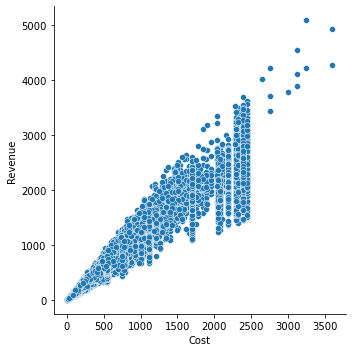

In [127]:
plt.figure(figsize=(20,7))
k=sns.relplot(x="Cost", y="Revenue",data=df);

# Multivariate Plots

The below charts show comparision of Data

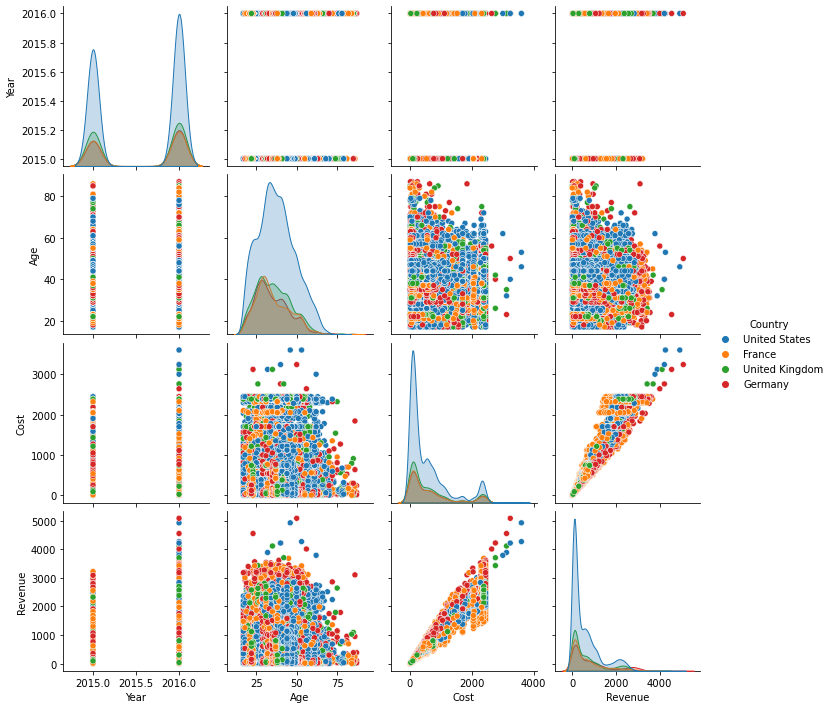

In [128]:
sns.pairplot(df, hue="Country")

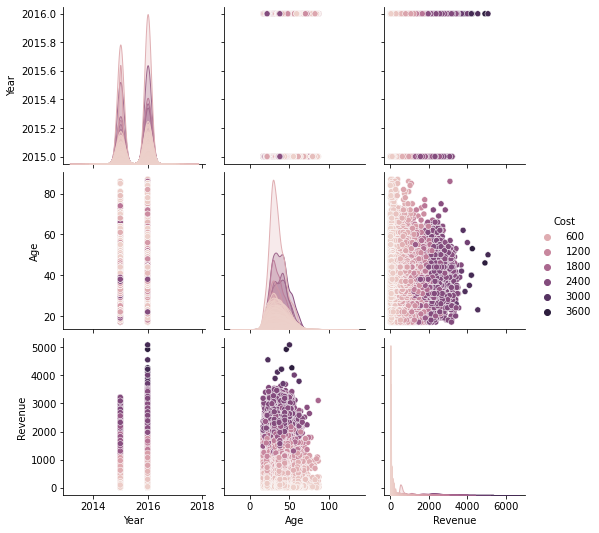

In [129]:
sns.pairplot(df, hue="Cost")

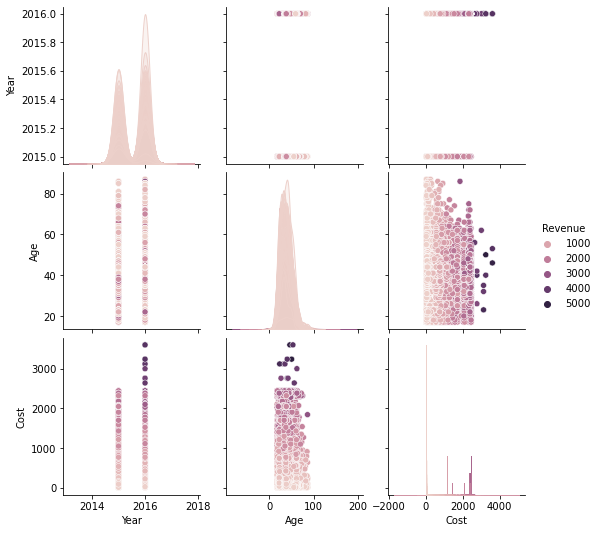

In [130]:
sns.pairplot(df, hue="Revenue")

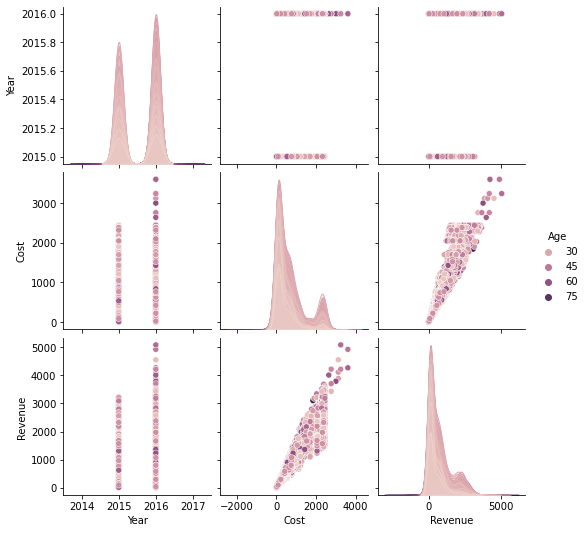

In [131]:
sns.pairplot(df, hue="Age")

<Figure size 1440x504 with 0 Axes>

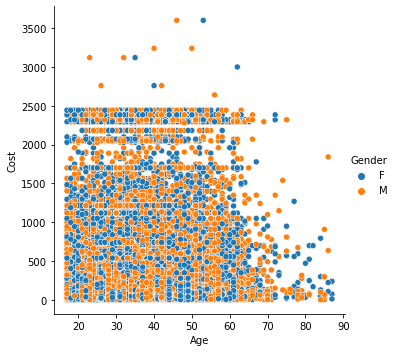

In [132]:
plt.figure(figsize=(20,7))
k=sns.relplot(x="Age", y="Cost", hue="Gender",data=df);

 The above pair plot shows male and female made almost equal purchases for fezzari accessories

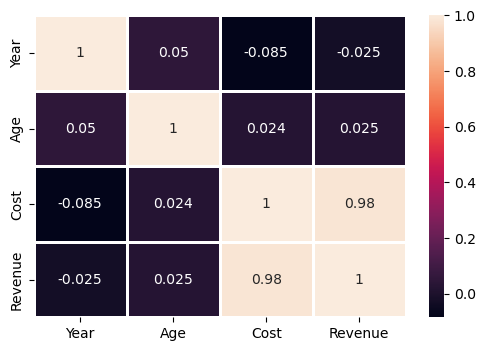

In [133]:
plt.figure(dpi = 100)
sns.heatmap(df.corr(),linecolor='white',linewidths=2,annot=True);

### Insights

1.The above heat map shows there is positive 98% correlation between Revenue and Cost. i.e one increases when other increases.<br>
2.The above heat map shows there is positive 2.4% correlation between Age and Cost. i.e one increses when other increases.<br>
3.The above heat map shows there is positive 2.5% correlation between Age and Revenue. i.e one increses when other increases.<br>
4.The above heat map shoes there is negtive 8.5% and 2.5% correlation between Cost/Revenue and Year. i.e Revenue and cost decreased with the time or Year.<br>

## Outcome / Conclusion

The DataSet contained over 34000+ rows and 13 coulmns. After cleaning the dataset of Fezzari Accessories sales data has 34856 rows and 9 columns.

[All the beloow points are in reference to the dataset in the year 2015 and 2016.]

1.ferrar has sales in Four major countries in United states <br> 
a) United States<br> 
b)United Kingdom<br> 
c)Germany<br> 
d)France<br> 
															 
United states has highest number of users i.e. 18076(over 50%)<br> 
united kingdom with 6421,<br>  Germany with 5201<br>  and france with 5168 sales count.
 
2.In the United states. California have the highest number of sales with 10331 followed by washington (5203) and Oregon (2446) which are maximum
 
3.Male and Female have almost equal share in purchase but male have a slight upeer hand with 17,805 sales and that of femal is 17,059.
 
4.People of 70 different age groups purhsed ferrri accesories, but people with the Age of 31 have sales count of 1307 followed by age group 28 with sales count of 1277.
 
5.When coming to the accesories for sales there re 17 ctegories In which Tubes and tyres are most sold ccessories and Bike racks are the least.<br>

Top five sales are <br>
### Category Name-------Count<br>
a. Tires and Tubes---------11110<br>
b. Bottles and Cages--------5295<br>
c. Helmets------------------4176<br>
d. Road Bikes---------------3022<br>
e. Mountain Bikes-----------2737<br>

Bottom 5 Sales are<br>

1.Hydration Packs------------396<br>
2.Socks----------------------364<br>
3.Vests----------------------312<br>
4.Bike Stands----------------145<br>
5.Bike Racks-----------------103<br>

6.ferrari accesories are purchased in three types<br> 
a.Cash(16702)<br> 
b.Credit card(11697)<br> 
c.Ewallet(6468)<br> 
Most of the payments sre done in Cash.<br> 

7.Accesory with Highest cost is Bike Racks with unit cost of 3600 a 46 year old male buyer from California state from united states purchased it.
Accesories with Lowest cost is tire and tubes with unit cost of 2.0 purchased by 53 year old female from united states californi.

8.<br> 
a.The above heat map shows there is positive 98% correlation between Revenue and Cost. i.e one increases when other increases.<br> 
b.The above heat map shows there is positive 2.4% correlation between Age and Cost. i.e one increses when other increases. <br> 
c.The above heat map shows there is positive 2.5% correlation between Age and Revenue. i.e one increses when other increases. <br> 
d.The above heat map shoes there is negtive 8.5% and 2.5% correlation between Cost/Revenue and Year. i.e Revenue and cost decreased with the time or Year.<br> 


### In Conclsion 
we can see from the Data. Fezzari has the maximum revenue from united states and more nummber of purchases are from people between age 25 and 40
fezzari can implement methods to increase digital payments by attracting the users with offers.

## References

a. https://tcsglobal.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733254?start=630#overview

b. https://www.kaggle.com/nivethithaamurugan/bike-accessories-sales-dataset

c. https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

d. https://numpy.org/doc/stable/reference/arrays.html

e. https://matplotlib.org/stable/plot_types/index.html

f. https://seaborn.pydata.org/
